<a href="https://colab.research.google.com/github/epowell101/mscGNN-work/blob/main/EP_looking_at_GNN_ODC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The following is scratch space for some initial work on modeling Sybil behavior using GNNs.  The overall idea is to build self supervised model(s) that become familiar with behaviors of wallets and to then fine tune with the help of labels.

Additional information about the overall project ideas is available in this Google doc:  [link text](https://)

In [ ]:
# collecting together installations and imports
!pip install networkx
!pip install torch-geometric
!pip install graphgym


import networkx as nx
import pandas as pd
import torch
from deepsnap.hetero_graph import HeteroGraph

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 661.6/661.6 kB 5.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for torch-geometric: filename=torch_geometric-2.3.1-py3-none-any.whl size=910460 sha256=ad40c5ae73c5a6f8b0af189b5505b03850bb928cc8b2abb19ff03bb17950f3b1
  Stored in directory: /root/.cache/pip/wheels/ac/dc/30/e2874821ff308ee67dcd7a66dbde912411e19e35a1addda028
Successfully built torch-geometric


In [ ]:
# Other imports including PDP
# PDP information is available at:  https://github.com/paradigmxyz/paradigm-data-portal

!pip install paradigm-data-portal
!pip install checkthechain

import math
import os
import shutil
import subprocess

import ctc
import ctc.rpc
from ctc.toolbox import pl_utils
import polars as pl
import matplotlib.pyplot as plt
# import toolplot
import numpy as np
import toolstr


In [ ]:
# connecting the accounts to Google Big Query - in case PDP is insufficient
# will create a module to access via Zetta as well to test it out

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

credentials = service_account.Credentials.from_service_account_file('odc ep.json')

client = bigquery.Client(credentials=credentials)

# Authenticate using Google account
auth.authenticate_user()


NameError: ignored

In [ ]:
# from google.colab import auth
# from google.cloud import bigquery
# from google.oauth2 import service_account
# from google.colab import files

from google.colab import files
# client = bigquery.Client(credentials=credentials)

# Authenticate using your Google account
# auth.authenticate_user()


# Define query
# query = """
#    SELECT *
#    FROM `bigquery-public-data.crypto_ethereum.transactions`
#    LIMIT 1000

# Run the query
# query_job = client.query(query)

# Get the results as a pandas DataFrame
# df = query_job.to_dataframe()

# remove blanks
# df = df.dropna(subset=['from_address', 'to_address'])

# Initialize an empty directed graph
# G = nx.DiGraph()

# Add edges to the graph based on the transactions
# for index, row in df.iterrows():
#    G.add_edge(row['from_address'], row['to_address'], weight=row['value'])



In [ ]:
import pandas as pd

# Upload the files - this should be adjusted to refer to location of files
from google.colab import files
uploaded = files.upload()

# Get the names of the uploaded files
data_paths = uploaded.keys()

# Read the Parquet files into pandas DataFrames
dfs = [pd.read_parquet(data_path) for data_path in data_paths]

# Now dfs[0] is the DataFrame for the first file, dfs[1] is for the second file, etc.
# You can access them separately like this:
df1 = dfs[0]
df2 = dfs[1]

# Or if you know the names of the files, you can access them like this:
# df1 = pd.read_parquet('file1.parquet')
# df2 = pd.read_parquet('file2.parquet')

# Count the unique values in a column
# def get_unique_column_count(df, column):
#    return df[column].nunique()

# Count the number of rows in the DataFrame
n_rows_df1 = df1.shape[0]
n_rows_df2 = df2.shape[0]

n_columns_df1 = df1.shape[1]
n_columns_df2 = df2.shape[1]

# Print the number of rows and columns in each data set
print('rows first dataset')
print(n_rows_df1)

print('rows second dataset')
print(n_rows_df2)

print('columns first dataset')
print(n_columns_df1)

print('columns second dataset')
print(n_columns_df2)




Saving ethereum_native_transfers__v1_0_0__00000000_to_00199999.parquet to ethereum_native_transfers__v1_0_0__00000000_to_00199999 (4).parquet
Saving ethereum_contracts__v1_0_0__00000000_to_00999999.parquet to ethereum_contracts__v1_0_0__00000000_to_00999999 (5).parquet
rows first dataset
119484
rows second dataset
9658
columns first dataset
6
rows second dataset
10


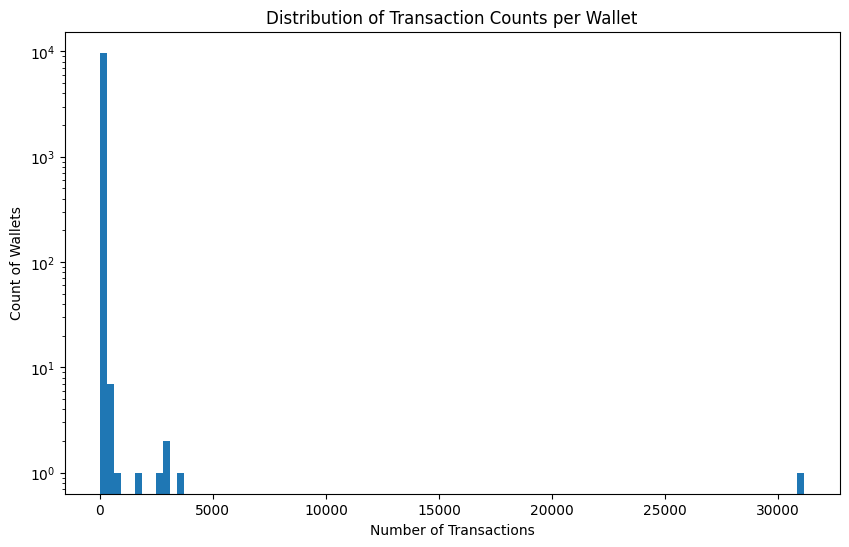

Index(['block_number', 'transfer_index', 'transaction_hash', 'from_address',
       'to_address', 'value'],
      dtype='object')


In [ ]:
# additional exploratory data analysis

import matplotlib.pyplot as plt

# Count the number of transactions for each wallet
transaction_counts = df1['from_address'].value_counts()

# Plot the distribution of transaction counts
plt.figure(figsize=(10, 6))
plt.hist(transaction_counts, bins=100, log=True)
plt.xlabel('Number of Transactions')
plt.ylabel('Count of Wallets')
plt.title('Distribution of Transaction Counts per Wallet')
plt.show()

print(df1.columns)


In [ ]:
# create the new DF based on the cut suggested from the above based on from_address

# Create a DataFrame of wallets with >= 1000 transactions
cex_df = df1[df1['from_address'].map(df1['from_address'].value_counts()) >= 1000]

# Create a DataFrame of wallets with < 1000 transactions
eoa_df = df1[df1['from_address'].map(df1['from_address'].value_counts()) < 1000]



In [ ]:
# Graph gym experiments

!pip install graphgym

from graphgym.config import set_cfg_from_file
from graphgym.train import train

# Load the configuration file
cfg_file = 'path_to_your_cfg_file.yaml'
set_cfg_from_file(cfg_file)

# Train the model
# train()


In [ ]:
# create a DeepSnap heterogeneous graph


# Create a dictionary to hold the node features for each type
node_feature = {
    "EOA": torch.randn(num_eoa_nodes, feature_dim),
    "Contract": torch.randn(num_contract_nodes, feature_dim),
    "CEX": torch.randn(num_cex_nodes, feature_dim),
}

# Create a dictionary to hold the edge indices for each edge type
edge_index = {
    "Transfer": transfers_df[['from_address', 'to_address']].values.T,
    "Invoke": invokes_df[['from_address', 'to_address']].values.T,
}

# Create a dictionary to hold the edge features for each edge type
# For simplicity, let's assume the edge features are the transfer values
edge_feature = {
    "Transfer": torch.tensor(transfers_df['value'].values),
    "Invoke": torch.tensor(invokes_df['value'].values),
}

# Create the HeteroGraph
hetero_graph = HeteroGraph(node_feature=node_feature, edge_index=edge_index, edge_feature=edge_feature)


NameError: ignored

Next steps likely to be:
- should we instead use Temporal Graphs? How do we combine w predicting Sybils via node classifications?  Would it still make sense to have initial embeddings?
- looks like SOTA might be http://snap.stanford.edu/caw/ Causal Annomous Walks for Inductive Learning
- a GAT or similar predicting edges based on self supervised (is GAT correct?)
- maybe use Graph GYM to run experiments - evaluate model
- another GNN to predict cycles and motifs that takes the embeddings for edges & nodes (pick the GNN)
  - here we can consider the use of SP - which is a normalized Z-score -
  - and we may trigger based on scores vs. the standard behavior on ethereum
  - counting the motifs of significance is crucial here
  - we may be able to use the SPMiner project at:  https://github.com/snap-stanford/neural-subgraph-learning-GNN
- supervised - categorize nodes as Sybils or not

Other considerations:
- sampling - will do mini batches & possibly will use other sampling as well
- oversmoothing may happen due to overlapping receptive fields of the nodes
- perhaps we can skip levels to avoid - and use other techniques
- for example, relatively few layers, but increase expressivity per layer
- we may not do the entire GraphGYM experiment - but could still want to borrow their stack, such as pre and post processing
- for skip connection, one promising approach is to skip to the final layer

In [ ]:
# Do basic graphing on a random selection of nodes

import matplotlib.pyplot as plt
import random

# Get all nodes in the graph
all_nodes = list(G.nodes)

# Randomly select X nodes
selected_nodes = random.sample(all_nodes, 1000)

# Create a subgraph
subgraph = G.subgraph(selected_nodes)

# Draw the subgraph
nx.draw(subgraph, with_labels=False,node_color='gray', node_size=5, edge_color='gray')
plt.show()




NameError: ignored

In [ ]:
# pseudo code for motif identification and counting

import networkx as nx
from networkx.algorithms import isomorphism
import itertools

# Find motifs

# Number of nodes in the motif
n = 3

# Generate all permutations of 2 elements from the set of nodes
perms = list(itertools.permutations(range(n), 2))

# Generate all combinations of these permutations
combs = [list(itertools.combinations(perms, i)) for i in range(len(perms) + 1)]

# Flatten the list of combinations
combs = [item for sublist in combs for item in sublist]

# Generate a graph for each combination of edges
motifs_3 = [nx.DiGraph(edges) for edges in combs]

# Only keep connected motifs
motifs_3 = [G for G in motifs if nx.is_weakly_connected(G)]

# Number of nodes in the motif
n = 4

# Generate all permutations of 2 elements from the set of nodes
perms = list(itertools.permutations(range(n), 2))

# Generate all combinations of these permutations
combs = [list(itertools.combinations(perms, i)) for i in range(len(perms) + 1)]

# Flatten the list of combinations
combs = [item for sublist in combs for item in sublist]

# Generate a graph for each combination of edges
motifs_4 = [nx.DiGraph(edges) for edges in combs]

# Only keep connected motifs
motifs_4 = [G for G in motifs_4 if nx.is_weakly_connected(G)]


# Combine the 3-node and 4-node motifs into a single list
motifs = motifs_3 + motifs_4

# Initialize a dictionary to hold your counts
counts = {period: {i: 0 for i in range(len(motifs))} for period in periods}

# For each period...
for period in periods:
    # Load the network for that period
    network = load_network_for_period(period)

    # For each motif...
    for i, motif in enumerate(motifs):
        # Create a DiGraphMatcher to find instances of the motif in the network
        matcher = isomorphism.DiGraphMatcher(network, motif)

        # Count the instances and store the count
        counts[period][i] = sum(1 for _ in matcher.subgraph_isomorphisms_iter())

# Now `counts` holds the raw counts of each motif in each period


In [ ]:
# Do same graphing using Plotly

!pip install plotly
import plotly.express as px
import random
import plotly.graph_objects as go
import networkx as nx

# Get all nodes in the graph
all_nodes = list(G.nodes)

# Randomly select X nodes
selected_nodes = random.sample(all_nodes, 1000)

# Create a subgraph
subgraph = G.subgraph(selected_nodes)

# Compute the positions of the nodes using a spring layout
pos = nx.spring_layout(subgraph)
nx.set_node_attributes(subgraph, pos, 'pos')

# Create the edge trace
edge_x = []
edge_y = []
for edge in subgraph.edges():
    x0, y0 = subgraph.nodes[edge[0]]['pos']
    x1, y1 = subgraph.nodes[edge[1]]['pos']
    edge_x.extend([x0, x1, None])
    edge_y.extend([y0, y1, None])

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

# Create the node trace
node_x = []
node_y = []
for node in subgraph.nodes():
    x, y = subgraph.nodes[node]['pos']
    node_x.append(x)
    node_y.append(y)

node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        colorscale='YlGnBu',
        reversescale=True,
        color=[],
        size=10,
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line_width=2))

# Color the nodes based on their degree
node_adjacencies = []
node_text = []
for node, adjacencies in enumerate(subgraph.adjacency()):
    node_adjacencies.append(len(adjacencies[1]))
    node_text.append('# of connections: '+str(len(adjacencies[1])))

node_trace.marker.color = node_adjacencies
node_trace.text = node_text

# Create the figure
fig = go.Figure(data=[edge_trace, node_trace],
             layout=go.Layout(
                title='<br>Network graph made with Python',
                titlefont_size=16,
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                )
fig.show()


In [ ]:
# add some descriptive statistics
import numpy as np

# Convert the 'block_timestamp' column to datetime
df['block_timestamp'] = pd.to_datetime(df['block_timestamp'])

# Find the earliest and latest transaction times
earliest_time = df['block_timestamp'].min()
latest_time = df['block_timestamp'].max()

print(f"Earliest transaction time: {earliest_time}")
print(f"Latest transaction time: {latest_time}")

# Get the degree of each node (returns a DegreeView object)
degrees = G.degree()

# Convert the DegreeView object to a list of degrees
degree_list = [degree for node, degree in degrees]

# Calculate and print the median degree
median_degree = np.median(degree_list)
print(f"Median transactions per node: {median_degree}")

# Get the degree of each node
node_degrees = dict(subgraph.degree())

# Filter nodes based on degree
filtered_nodes = [node for node, degree in node_degrees.items() if degree > 2]

# Print the filtered nodes with Etherscan URLs

etherscan_url = "https://etherscan.io/address/"

# Generate Etherscan URLs for each address
etherscan_urls = [etherscan_url + node for node in filtered_nodes]

# Print the Etherscan URLs
for url in etherscan_urls:
    print(url)




Earliest transaction time: 2023-07-24 19:51:59+00:00
Latest transaction time: 2023-07-24 20:40:23+00:00
Median transactions per node: 1.0
https://etherscan.io/address/0xbf94f0ac752c739f623c463b5210a7fb2cbb420b
https://etherscan.io/address/0x7a250d5630b4cf539739df2c5dacb4c659f2488d
https://etherscan.io/address/0xbf42c1972877f39e102807e5e80ed2ff5d16aa5f
https://etherscan.io/address/0xf411903cbc70a74d22900a5de66a2dda66507255
https://etherscan.io/address/0x53a28fbbc0a6741b715c1e02b8c41c1aa241154f
https://etherscan.io/address/0xcb7d1b6648e13c43a3e5a98eb700428fc84a45ec
https://etherscan.io/address/0x3fc91a3afd70395cd496c647d5a6cc9d4b2b7fad
https://etherscan.io/address/0x46340b20830761efd32832a74d7169b29feb9758
https://etherscan.io/address/0xcac0f1a06d3f02397cfb6d7077321d73b504916e
https://etherscan.io/address/0xef251ea2358452d42107aa5803eef8fa19c373bb
https://etherscan.io/address/0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2
https://etherscan.io/address/0x6b175474e89094c44da98b954eedeac495271d0

In [ ]:
#add information about each of tehse more active nodes such as balance using the etherscan API

import requests
import time

# Etherscan API URL
etherscan_api_url = "https://api.etherscan.io/api"

# Your Etherscan API key
etherscan_api_key = "WFMKAR265SIM4ZFZGD9P5BNY1GNADYY3T7"

# List to store balances
balances = []

# Iterate over each Ethereum address
for address in filtered_nodes:
    # Define the parameters for the API request
    params = {
        "module": "account",
        "action": "balance",
        "address": address,
        "tag": "latest",
        "apikey": etherscan_api_key
    }

    # Make the API request
    response = requests.get(etherscan_api_url, params=params)

    # Parse the response JSON
    data = response.json()

    # Get the balance from the response
    balance = round(int(data["result"]) / 10**18, 2)  # Convert from Wei to Ether and round to 2 decimal places

    # Append the balance to the list
    balances.append(balance)

    # Get the account type from the response
    account_type = data["message"]

    # Append the account type to your account info
    account_info.append((etherscan_url + address, balance, account_type))

    # Determine the account type based on the message
    if account_type == "No blocks found":
      account_type = "EOA"
    else:
      account_type = "Contract"

    # Sleep for 0.2 seconds to avoid hitting the rate limit
    time.sleep(0.2)

# Base Etherscan URL
etherscan_url = "https://etherscan.io/address/"

# Create a list of tuples, each containing an account's Etherscan URL and balance
account_info = [(etherscan_url + account, balance) for account, balance in zip(filtered_nodes, balances)]

# Sort the list of tuples by balance in descending order
account_info.sort(key=lambda x: x[1], reverse=True)

# Print the sorted list of Etherscan URLs and balances
for url, balance in account_info:
    print(f"{url}: {balance} Ether:  {account_type}")





https://etherscan.io/address/0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2: 3439227.8 Ether:  Contract
https://etherscan.io/address/0x28c6c06298d514db089934071355e5743bf21d60: 63156.67 Ether:  Contract
https://etherscan.io/address/0xf89d7b9c864f589bbf53a82105107622b35eaa40: 16370.92 Ether:  Contract
https://etherscan.io/address/0xdfd5293d8e347dfe59e90efd55b2956a1343963d: 15012.8 Ether:  Contract
https://etherscan.io/address/0xbf94f0ac752c739f623c463b5210a7fb2cbb420b: 14475.31 Ether:  Contract
https://etherscan.io/address/0x21a31ee1afc51d94c2efccaa2092ad1028285549: 11849.41 Ether:  Contract
https://etherscan.io/address/0x46340b20830761efd32832a74d7169b29feb9758: 9921.55 Ether:  Contract
https://etherscan.io/address/0x503828976d22510aad0201ac7ec88293211d23da: 3736.42 Ether:  Contract
https://etherscan.io/address/0xcbd6832ebc203e49e2b771897067fce3c58575ac: 2627.82 Ether:  Contract
https://etherscan.io/address/0x75e89d5979e4f6fba9f97c104c2f0afb3f1dcb88: 744.67 Ether:  Contract
https://ethersc

Having imported some number of recent transactions and looked at the data initially, the next step is to start to attempt to find patterns in the data.

One question is how to do this with a reasonable number of connections.  

Another consideration is what other indicators could show belonging to a community. Perhaps we can start to identify motifs as a next step.